In [1]:
#Install OPENCV
#!pip install opencv-python
#!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

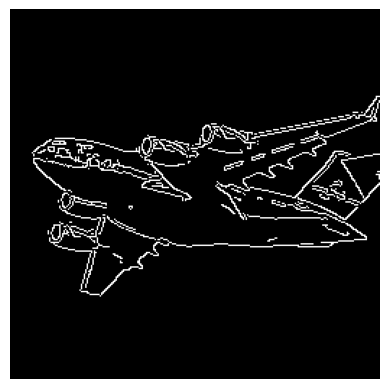

In [55]:
# Detecting Edges - Canny edge detector

# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_gray = cv2.imread("sim_data-master/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

See also Sobel filters and Laplacian edge detectors

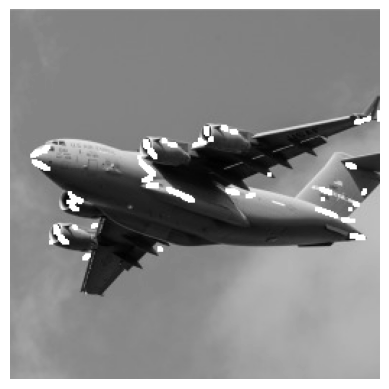

In [34]:
# Detecting Corners - Harris corner detector

# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_bgr = cv2.imread("sim_data-master/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
 block_size,
aperture,
free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
 threshold * detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

The Harris corner detector is a commonly used method of detecting the intersection of two edges. Detecting corners is motivated by the same reason as for deleting edges: corners are points of high information.

*cornerHarris* contains three important parameters that we can use to control the edges detected. First, block_size is the size of the neighbor around each pixel used for corner detection. Second, aperture is the size of the Sobel kernel used (don’t worry if you don’t know what that is), and finally there is a free parameter where larger values correspond to
identifying softer corners.

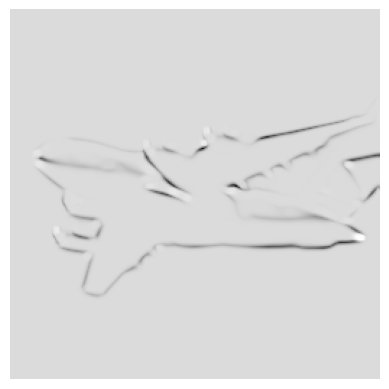

In [35]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

We then apply thresholding to keep only the most likely corners. Alternatively, we
can use a similar detector, the Shi-Tomasi corner detector, which works in a similar
way to the Harris detector (goodFeaturesToTrack) to identify a fixed number of
strong corners. goodFeaturesToTrack takes three major parameters—the number of
corners to detect, the minimum quality of the corner (0 to 1), and the minimum
Euclidean distance between corners:

**Edge Detection Filters:** 

**Sobel Filter:** Detects edges by convolving the image with Sobel kernels to calculate gradients.

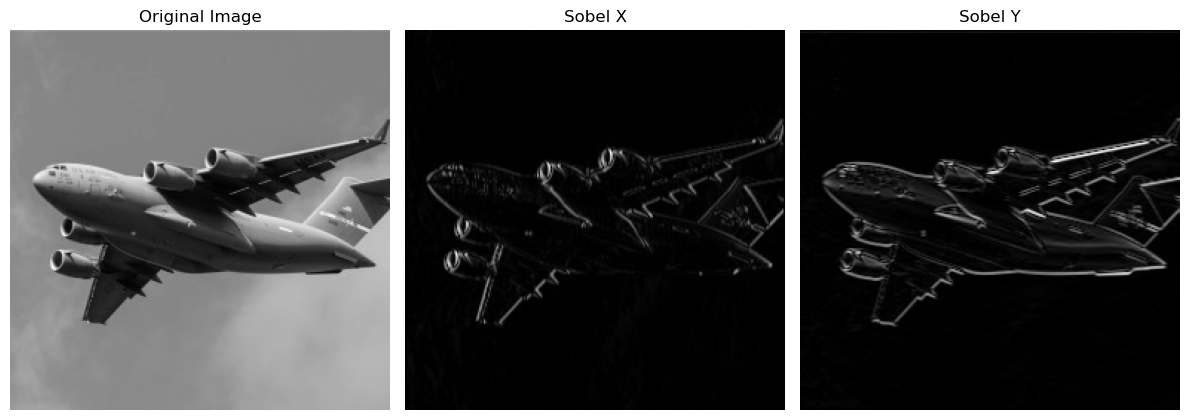

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load and read the image
image_path = 'sim_data-master/images/plane_256x256.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter to the image
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel filter in x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter in y-direction

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Display the original image and gradient magnitude using imshow
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient in X-direction
plt.subplot(1, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# Gradient in Y-direction
plt.subplot(1, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.tight_layout()
plt.show()

**Canny Edge Detector:** Applies a multi-stage algorithm to detect a wide range of edges in images.

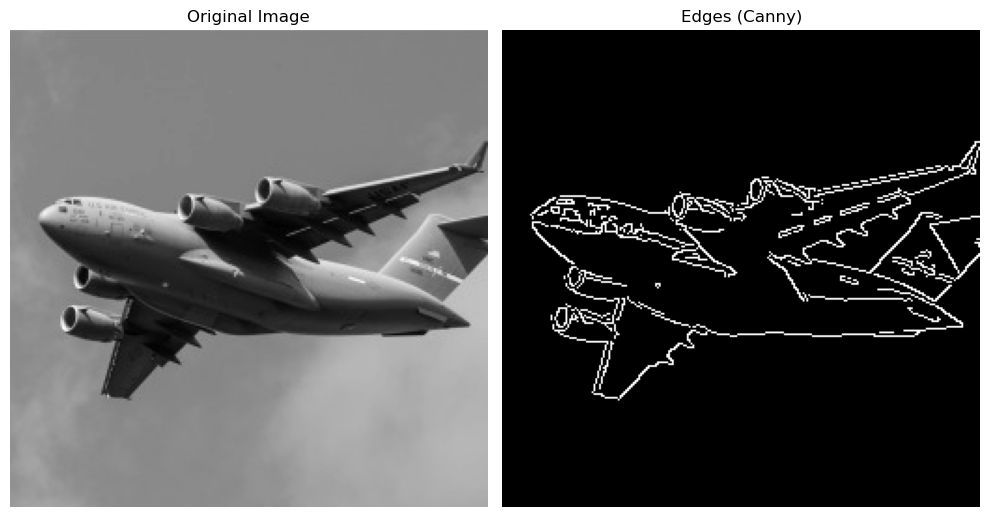

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load and read the image
image_path = 'sim_data-master/images/plane_256x256.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection to the image
edges = cv2.Canny(image, threshold1=100, threshold2=200)  # Adjust thresholds as needed

# Display the original image and the edges using imshow
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

**Sharpening Filters:**

**Laplacian Filter:** Enhances edges and details by highlighting abrupt intensity changes.

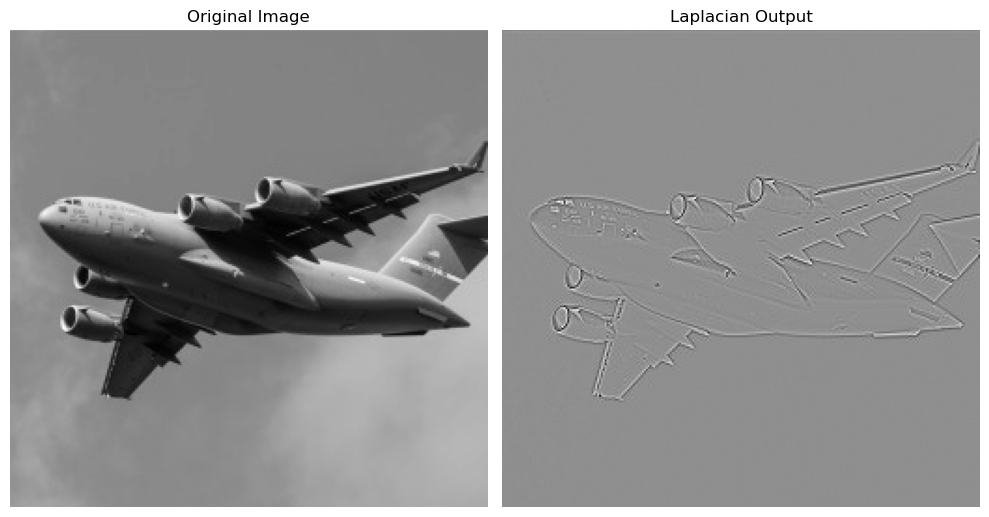

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load and read the image
image_path = 'sim_data-master/images/plane_256x256.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter to the image
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original image and the Laplacian output using imshow
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Laplacian Output
plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Output')
plt.axis('off')

plt.tight_layout()
plt.show()

**Gradient Filters:**

**Scharr Filter:** Computes gradients with improved rotation invariance compared to Sobel filters. The Scharr filter is often used for edge detection in image processing.

In [49]:
!pip install numpy matplotlib scipy scikit-image

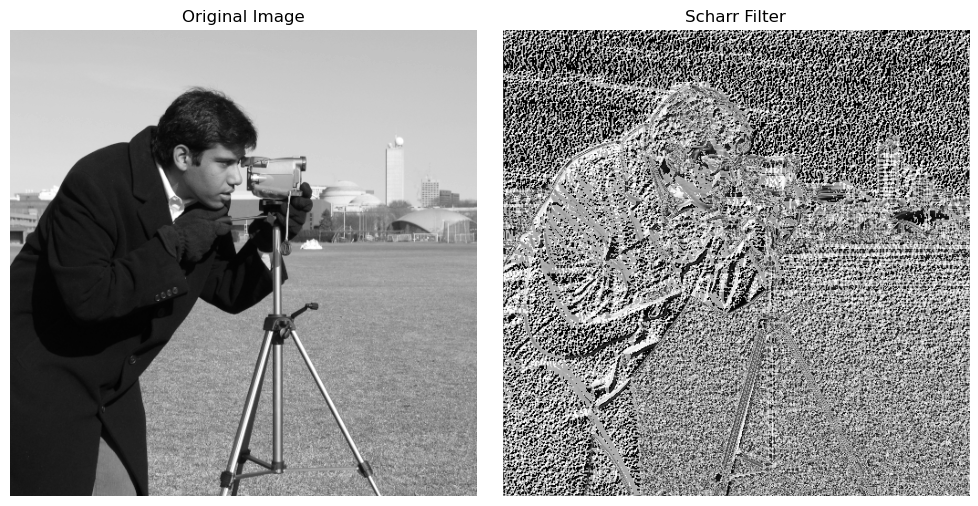

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import data, color

# Load an example image
image = data.camera()   # TRY ALSO THIS IMAGE
#image_path = 'sim_data-master/images/plane_256x256.jpg'
#image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert to grayscale if needed
if len(image.shape) > 2:
    image = color.rgb2gray(image)

# Apply the Scharr filter using scipy.ndimage
sobel_x = ndimage.sobel(image, axis=1, mode='constant')
sobel_y = ndimage.sobel(image, axis=0, mode='constant')
scharr = np.hypot(sobel_x, sobel_y)

# Display the original image and the Scharr-filtered image using imshow
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scharr, cmap='gray')
plt.title('Scharr Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

**Prewitt Filter:** Calculates image gradients using a small convolutional kernel.
The Prewitt filter is another edge detection filter

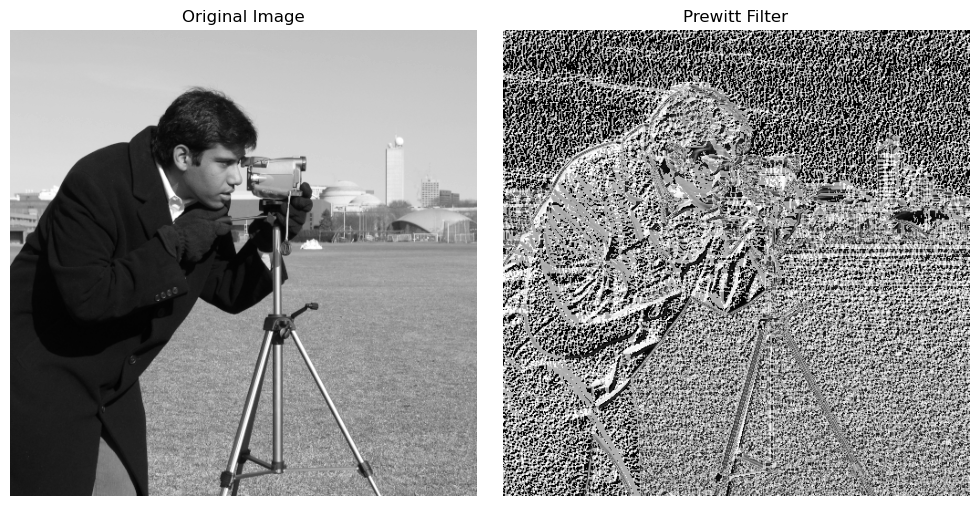

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import data, color

image = data.camera()  # You can replace this with your own image

# image_path = 'sim_data-master/images/plane_256x256.jpg'
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if len(image.shape) > 2:
    image = color.rgb2gray(image)
    
prewitt_x = ndimage.prewitt(image, axis=1)
prewitt_y = ndimage.prewitt(image, axis=0)
prewitt = np.hypot(prewitt_x, prewitt_y)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

**Hough Transform:** Detects shapes like lines and circles in an image by transforming the image space into parameter spaces.

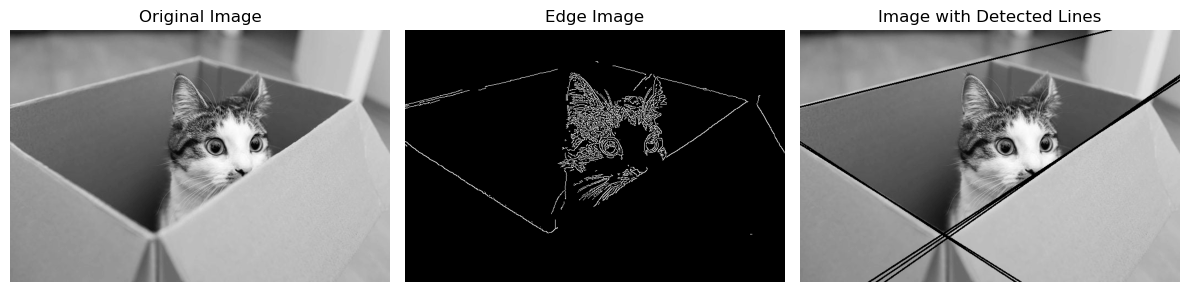

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sim_data-master/images/cat.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

edges = cv2.Canny(image, threshold1=110, threshold2=150)  # Apply Canny edge detection
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=120)  # Apply Hough Line Transform

# Draw the detected lines on a copy of the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(line_image, cmap='gray')
plt.title('Image with Detected Lines')
plt.axis('off')

plt.tight_layout()
plt.show()

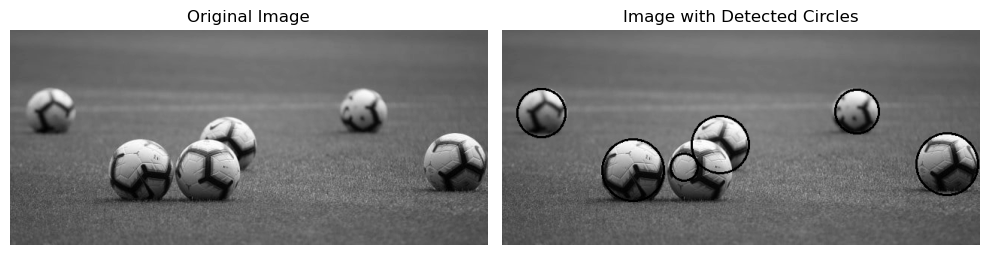

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sim_data-master/images/ballons.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Apply Gaussian blur to reduce noise and improve circle detection
blurred_image = cv2.GaussianBlur(image, (9, 9), 2)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
    param1=100, param2=30, minRadius=10, maxRadius=100
)

# Draw detected circles on a copy of the original image
circle_image = np.copy(image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(circle_image, center, radius, (0, 255, 0), 2)
        
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(circle_image, cmap='gray')
plt.title('Image with Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()